# Topics in Quantitative Finance, Summer 2023 

## Lecture 7: Optimal execution under price impact
    
<br>
<br>

<center>
<font size=5, color=darkblue> Tai-Ho Wang (王 太和)</font>
</center>
<img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2016/04/MFE-Logo.jpg" align = "center" width=450>

$$
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\F}{\mathcal{F} }
\newcommand{\cF}{\mathcal{F} }
\newcommand{\cG}{\mathcal{G} }
\newcommand{\E}{\mathbb{E} }
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\Etof}[1]{\mathbb{E}_t\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\p}{\partial}
\newcommand{\PP}{\mathbb{P} }
\newcommand{\Pof}[1]{\mathbb{P}\left[ #1 \right]}
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\R}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\Hess}{\mathrm{Hess} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bit}{\begin{itemize}}
\newcommand{\eit}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\tr}{\mbox{tr}}
\newcommand{\underbar}{\underline}
\newcommand{\mbA}{\mathbf A}
\newcommand{\mbB}{\mathbf B}
\newcommand{\mbP}{\mathbf P}
\newcommand{\mbQ}{\mathbf Q}
\newcommand{\mbR}{\mathbf R}
\newcommand{\mbS}{\mathbf S}
\newcommand{\bA}{\boldsymbol A}
\newcommand{\bB}{\boldsymbol B}
\newcommand{\bu}{\boldsymbol u}
\newcommand{\bq}{\boldsymbol q}
\newcommand{\bW}{\boldsymbol W}
\newcommand{\bX}{\boldsymbol X}
\newcommand{\bx}{\boldsymbol x}
\newcommand{\bSigma}{\boldsymbol \Sigma}
\newcommand{\tS}{\tilde S}
\newcommand{\inn}[2]{\left\langle #1, #2 \right\rangle}
$$

## Agenda

- Market impact of meta orders
    - Impact profile
- Empirical market impact profiles
- Optimal execution as variational and control problems
    - risk neutral
    - mean-qv optimization
- The Almgren-Chriss model and the Almgren-Chriss optimal liquidation strategy
- The Obizhaeva-Wang model
- Combining Almgren-Chriss and Obizhaeva-Wang: the ACOW model
    - Numerical examples

## What is market or price impact?

Empirically, in average a buy order pushes the price up whereas a sell order sends the price down. This empirically observed market phenomenon is referred to as *price impact* of transaction or trading. 

A price impact model is a model aiming at quantify the relationship between the transacted volume and price. 

## The square-root formula for market impact

-   For many years, traders have used the simple sigma-root-liquidity
    model described for example by Grinold and Kahn in 1994.

-   Software incorporating this model includes:
    -   Salomon Brothers, StockFacts Pro since around 1991
    -   Barra, Market Impact Model since around 1998
    -   Bloomberg, TCA function since 2005

-   The model is always of the rough form    
    $$\Delta P = \text{Spread cost} +\alpha\,\sigma\,\sqrt{\frac Q V}$$
    where $\sigma$ is daily dollar volatility, $V$ is daily volume, $Q$ is the
    number of shares to be traded and $\alpha$ is a constant pre-factor
    of order one.

## Commonly applied algorithms

-   VWAP “Volume weighted average price”
    -   Trades at constant rate in volume time

-   POV “Percentage of volume”
    -   Participate at a certain percentage of market volume
    
-   TWAP “Time weighted average price”
    -   Trades at constant rate in wall clock time

-   IS “Implementation shortfall”
    -   Trades faster at the beginning and more slowly at the end
    -   To balance the risk of a worse price against the benefit of
        better execution from being patient.

## Terminology

- *Metaorder* means that a sufficiently large order that cannot be filled immediately without eating into the order book.
    - Such orders need to be split.
    - Each component of a metaorder is referred to as a *child order*.
- The <font color=blue> *impact profile* </font> refers to the average path of the stock price during and after execution of a metaorder.
- *Completion* refers to the timestamp of the last executed child order.

## Schematic of impact profile

<h2><img src="https://mfe.baruch.cuny.edu/wp-content/uploads/2015/04/ShapiroPlot.png" align = "center" width=500></h2>
Figure: The impact profile

## Stylized features of  impact profile

-   When a buy metaorder of length $T$ is sent, its immediate effect is
    to move the price upwards (to $S_T$ say).

-   After completion, the price reverts to some price $S_{\infty}$
    (which may be the starting price $S_0$).

-   Market impact thus has two components: one transient and one permanent.

-   Knowledge of the metaorder impact profile is key to the derivation
    of optimal execution strategies.

## Empirical market impact profiles from [Bacry et al.] 


<img src="https://mfe.baruch.cuny.edu/wp-content/uploads/2017/04/BacryFigure8.png" align = "center" width=900>

## Empirical market impact profiles from [Zarinelli et al.]

<img src="https://mfe.baruch.cuny.edu/wp-content/uploads/2017/04/TreccaniFigure13.png" align = "center" width=900>

## Notations

The following notations will be used throughout.

- $S_t$: mid or efficient price
- $\tilde S_t$: transaction price. Thus, $\tilde S_t = S_t + $ spread.
- $\sigma$: volatiltiy of stock.
- $Z_t$: Brownian motions
- $v_t$: trading rate at time $t$
- $X_t$: remaining orders to be executed at time $t$

## Almgren and Chriss

- Almgren and Chriss treats the execution of a meta order as a tradeoff between risk and execution cost.

- According to their formulation:

    - The faster an order is executed, the higher the execution cost
    - The faster an order is executed, the lower the risk (which is
        increasing in position size).

- Note that this is inconsistent with the empirical success of the
    square-root formula in describing the cost of meta orders.


## The price impact model of Almgren and Chriss 

For simplicity, we consider liquidation of an existing position $X$.
Denote the position at time $t$ by $x_t$ with $x_0=X$ and $x_T=0$.

Almgren and Chriss model market impact and slippage as follows.

$$
\tilde{S}_t = S_t + \eta v_t = s_0 + \sigma_S Z_t + \gamma(X_t - x_0) + \eta v_t,
$$

where $X_t = x_0 + \int_0^t v_s ds$.

### Note
- $\eta v_t$: temporary impact
- $\gamma (X_t - x_0)$: permanenty impact
- $X_t = x_0 + v t$ if $v_t \equiv v$, a constant. 



## Impact profile in the Almgren and Chriss model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

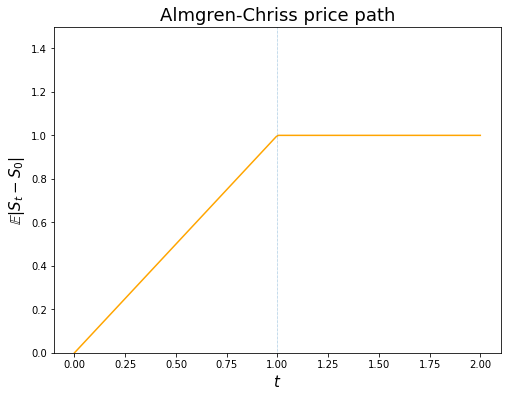

In [2]:
T = 1
vwap_AC = lambda t: t/T*(t <= T) + T*(t > T)
t = np.linspace(0, 2, 200)
plt.figure(figsize=(8, 6))
plt.plot(t, vwap_AC(t), color='orange', label='Almgren-Chriss')
plt.vlines(x=1, ymin=0, ymax=2, linewidth=0.5, ls='dotted')
plt.ylim([0, 1.5])
plt.xlabel(r'$t$', fontsize=15)
plt.ylabel(r'$\mathbb{E}|S_t - S_0|$', fontsize=15)
plt.title('Almgren-Chriss price path', fontsize=18);

## Inconsistency with empirical observation

-   This price path is inconsistent with empirical observation:
    -   The average price path during execution is linear.
    -   There is no price reversion after completion of the order.

## P&L and cost of trading of a trading strategy

Let $x_t$ be a trading strategy. The corresponding P&L (up to time $t$), denoted by $\Pi_t(x)$, is identified as 

$$
\Pi_t(x) := x_t (S_t - S_0) + \int_0^t (S_0 - \tilde S_\tau) d x_\tau.
$$

- The first term represents the (fair) value of stock shares that are yet to be transacted.

- The second term corresponds to the monetary value collected from the shares that have been transacted up to time t.

- Obviously, should there be no trade in the time interval $[0,t]$, i.e., $x_s = X$ for all $s \in [0,t]$, the P&L reads $\Pi_t(x) = X (S_t - S_0)$; reflecting the P&L from the price movement of the stock.

#### <font color=blue>Implementation shortfall as cost of trading </font>

Negative P&L is also referred to as the *implementation shortfall*, which will be used as the cost of trading, denoted by $C$ hereafter.

## P&L in Almgren-Chriss model

Note that, at the end of execution period $T$, the P&L reads
$$
  \Pi_T(x) = x_T (S_T - S_0) + \int_0^T (S_0 - \tilde S_u) d x_u,
$$
should there be $x_T$ shares yet to be transacted. Hence, in Almgren-Chriss model 

\begin{eqnarray*}
\Pi_T(x) &=& x_T (S_T - S_0) + \int_0^T (S_0 - \tilde S_u) d x_u \\
&=& \int_0^T [- \gamma (x_u - X) - \sigma Z_u - \eta v_u] d x_u \quad (\mbox{note that } x_T = 0) \\
&=& -\frac\gamma2 X^2 + \sigma \int_0^T x_u d Z_u - \eta \int_0^T v_u^2 du \quad (\mbox{Integration by parts}).
\end{eqnarray*}
Therefore, the expected cost corresponding to the trading strategy $x$ is given by  
\begin{eqnarray*}
&& \E\left[C_T(x)\right] = \E\left[-\Pi_T(x)\right] = \frac\gamma2 X^2 + \eta \int_0^T \Eof{v_u^2} du.
\end{eqnarray*}

## Expected cost of TWAP in the Almgren and Chriss model

For a TWAP, $v_t = -\frac XT$ where $X$ is the total trade size and $T$ is the
duration of the order.

\begin{eqnarray*}
\E[C_T(x)] &=& \frac\gamma2 X^2 + \eta \int_0^T \left(\frac XT\right)^2 du \\
&=& \frac\gamma2 X^2 + \eta \frac{X^2}T \\
&=& \left(\frac\gamma2 + \frac\eta{T}\right)X^2.
\end{eqnarray*}

The cost per share $\hat C$ of executing an order using TWAP is therefore

$$\hat{C}=\left(\frac\gamma2 + \frac\eta{T}\right)X$$

which is linear in the trade
size $X$ and inversely proportional to the duration of the order.


## Optimal strategy of a risk neutral trader

For a risk neutral trader whose objective is to minimize the cost of trading, the optimal control problem reads 

\begin{eqnarray*}
&& \min_{v} \E\left[C_T(x)\right] \\
&=& \min_{v} \left\{\frac\gamma2 X^2 + \eta \int_0^T \Eof{v_u^2} du \right\} \\
&=& \frac\gamma2 X^2 + \eta \min_v \int_0^T \Eof{v_u^2} du,
\end{eqnarray*}

where the state variable $x_t$ is driven by $dx_t = v_t dt$ with the constraints $x_0 = X$ and $x_T = 0$.   
Note that, since $S_t$ is not involved in the last expression, we end up with a deterministic control problem which can be solved by the solution to its assocated HJB equation or, due to the simplicity of the dynamics of $x_t$, further reduced to a variational problem.

## Variational problem 

$$\min_x \int_0^T\,\dot x_t^2\,dt$$

with $v_t=\dot x_t$ and $x_0 = X$, $x_T = 0$. 

The Euler-Lagrange equation is then

$$\partial_t v_t=\partial_t^2 x_t=0$$

with boundary conditions
$x_0=X$ and $x_T=0$ and the solution is obviously

$$v_t = -\frac{X}{T}; \, x_t=X\,\left(1-\frac{t}{T}\right)$$

## Risk neutral trader: TWAP is optimal in Almgren-Chriss

As naive as the TWAP strategy may look, it is indeed optimal for a risk neutral trader in the Almgren-Chriss model. 

## Penalty by quadratric variation 

[Almgren and Chriss]<sup id="cite_ref-AlmgrenChriss" class="reference"><a href="#cite_note-AlmgrenChriss"><span>[</span>2<span>]</span></a></sup> add a risk term that penalizes the approximate variance
of the trading cost. They claim 

$$ \mbox{Var} \left[\int_0^T\,x_t\,dS_t\right] \approx \sigma^2\,\int_0^T\,x_t^2\,dt. $$

In fact, by It&ocirc;'s isomety, it is an equality if $x_t$ is deterministic. 

The expected risk-adjusted cost is then given by (temporarily ignore the path independent term $\frac\gamma2 X^2$)

$$\eta\,\int_0^T\,{\dot x}_t^2\,dt + \lambda\,\sigma^2\,\int_0^T\,x_t^2\,dt$$

for some price of risk $\lambda$.

-   <span>Note the analogies to physics and portfolio theory.</span>

    -   <span>The first term looks like kinetic energy and the second
        term like potential energy.</span>

    -   <span>The expression looks like the objective in mean-variance
        portfolio optimization.</span>

The Euler-Lagrange equation becomes 

$$\ddot x- \kappa^2\,x=0$$ 

with

$$\kappa^2=\frac{\lambda\,\sigma^2}{\eta}.$$ 

The solution is a linear
combination of terms of the form $e^{\pm \kappa t}$ that satisfies the
boundary conditions $x_0=X$, $x_T=0$. 

## Mean-QV trader: The Almgren-Chriss strategy

For risk averse traders, by using the quadratic vartion of P&L during execution to penalize the terminal P&L/trading cost, the following strategy, referred to as the Almgren-Chriss strategy, is optimal. 

$$
x(t) = X\,\frac{\sinh \kappa (T-t)}{\sinh \kappa T},
$$

where $\kappa = \sqrt{\frac{\lambda\sigma_S^2}\eta}$, $\lambda$ is the parameter that proxies the trader's risk aversion. 

### Note
- The strategy is deterministic. 
- Almgren-Chriss strategy gives an example of Implementation Shortfall type: trade fast at the beginning and more slowly towards the end. 

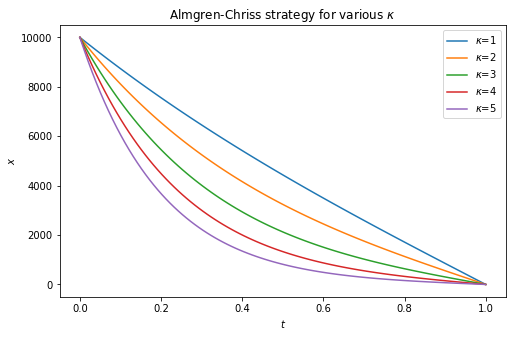

In [3]:
# order execution horizon
T = 1

# number of shares to execute
X = 10_000

# the Almgren-Chriss strategy
opt_AC = lambda t, kappa: X*np.sinh(kappa*(T - t))/np.sinh(kappa*T)

# plot
t = np.linspace(0, T, 100)
plt.figure(figsize=(8, 5))
for kappa in np.arange(1, 6):
    plt.plot(t, opt_AC(t, kappa), label=f'$\kappa$={kappa}')
    
plt.title('Almgren-Chriss strategy for various $\kappa$')
plt.xlabel(r'$t$')
plt.ylabel(r'$x$')
plt.legend();

## Applications of the Almgren-Chriss framework

-   Although the Almgren and Chriss price process is not particularly
    realistic, it leads to a tractable framework for solving a number of
    interesting practical problems.

-   Applications include:

    -   Portfolio liquidation

    -   Optimal liquidation with a dark pool (<span>*e.g.*</span>
        [Kratz and Schöneborn]<sup id="cite_ref-KratzSchoeneborn" class="reference"><a href="#cite_note-KratzSchoeneborn"><span>[</span>7<span>]</span></a></sup>)

    -   Optimal delta-hedging of options under transactions costs
        (<span>*e.g.*</span> [Li and Almgren]<sup id="cite_ref-LiAlmgren" class="reference"><a href="#cite_note-LiAlmgren"><span>[</span>8<span>]</span></a></sup>)

    -   Optimal liquidation in the presence of a trading signal
        (<span>*e.g.*</span> [Almgren(2012)]<sup id="cite_ref-AlmgrenSignal" class="reference"><a href="#cite_note-AlmgrenSignal"><span>[</span>3<span>]</span></a></sup>)

## Summary on the Almgren-Chriss model

-   The Almgren-Chriss price process is in practice the most
    widely-used.

-   It forms the basis for many of the algorithms and most of the
    thinking in algorithmic execution.

    -   despite the fact that it is unrealistic: market impact decays
        instantaneously and it is completely incompatible with the
        square-root law.

-   Because of the analytical tractability of the Almgren-Chriss
    framework, there are closed-form or quasi-closed-form solutions for
    many problems of practical interest.

## Transient impact models

The price process assumed in transient impact model is

$$S_t = S_0 + \int_0^t\,h(v_s)\,G(t-s)\,ds+M_t, \quad \mbox{ where } M_t \mbox{ is a zero mean martingale/noise.}$$


- $h(v_s)$ is referred to as the *instantaneous market impact function*, which represents the impact of trading at time $s$, and $G(t-s)$ is a decay factor. Note that $h(v) > 0$ if $v > 0$; whereas $h(v) < 0$ if $v < 0$. 


- The cumulative impact of (others’) trading is implicitly in $S_0$ and the noise term.


- The model is a generalization of processes due to Almgren, Bouchaud, and Obizhaeva and Wang.

## P&L and cost of trading in transient impact model

Note that, at the end of execution period $T$, the P&L reads
$$
  \Pi_T(x) = x_T (S_T - S_0) + \int_0^T (S_0 - \tilde S_u) d x_u,
$$
should there be $x_T$ shares yet to be transacted. Hence, in transient impact model (note that $\tilde S_t = S_t$)

\begin{eqnarray*}
\Pi_T(x) &=& x_T (S_T - S_0) + \int_0^T (S_0 - \tilde S_u) d x_u \\
&=& - \int_0^T \int_0^t h(v_u)G(t-u) du d x_t - \int_0^T M_t d x_t \quad (\mbox{since } x_T = 0) \\
&=& - \int_0^T \int_0^t h(v_u)G(t-u) du d x_t - (M_T x_T - M_0 x_0) + \int_0^T x_t d M_t \quad (\mbox{Integration by parts}) \\
&=& - \int_0^T \int_0^t h(v_u)G(t-u) du d x_t + \int_0^T x_t d M_t \quad (\mbox{since } x_T = 0 \mbox{ and } M_0 = 0).
\end{eqnarray*}
Therefore, the expected cost corresponding to the trading strategy $x$ is given by  
\begin{eqnarray*}
&& \E\left[C_T(x)\right] = \E\left[-\Pi_T(x)\right] = \Eof{\int_0^T \int_0^t h(v_u)G(t-u) du d x_t}.
\end{eqnarray*}

## The optimal strategy of a risk neutral trader

For a risk neutral trader whose objective is to minimize the expected cost of trading, the optimal control problem reads 

\begin{eqnarray*}
&& \min_{v} \E\left[C_T(x)\right] = \min_v \int_0^T \int_0^t h(v_u)G(t-u) du d x_t,
\end{eqnarray*}

where the state variable $x_t$ is driven by $dx_t = v_t dt$ with the constraints $x_0 = X$ and $x_T = 0$. 
It is equivalent to a variational problem.

\begin{eqnarray*}
&& \min_{v} \E\left[C_T(x)\right] = \min_v \left\{\int_0^T \int_0^t h(v_u)G(t-u) du v_t dt\right\},
\end{eqnarray*}

subject to the constraint $\int_0^T v_t dt = X$.

## Lagrange multiplier  

To derive the Euler-Lagrange equation, consider the Lagrangian

\begin{eqnarray*}
  && L(v,\lambda) = \int_0^T\int_0^t v_t G(t-s) h(v_s) ds dt - \lambda \left( \int_0^T v_t dt - X \right) \\
  &=& \int_0^T \left[ \int_0^t G(t-s) h(v_s) ds - \lambda \right] v_t dt + \lambda X,
\end{eqnarray*}

where $\lambda$ is the Lagrange multiplier. 

## Euler-Lagrange equation

Let $\varphi$ be a perturbation. Consider the first order criterion for the Lagrangian $L$:

\begin{eqnarray*}
  0 &=& \left.\frac{d}{d\epsilon}\right|_{\epsilon=0} L( v_t + \epsilon \varphi_t,\lambda) \\
  &=& \left.\frac{d}{d\epsilon}\right|_{\epsilon=0} \int_0^T \left[ \int_0^t G(t-s) h(v_s + \epsilon \varphi_s) ds - \lambda \right] (v_t + \epsilon \varphi_t ) dt  \\
  &=& \int_0^T \left[ \int_0^t G(t-s) h'(v_s) \varphi_s ds \right] v_t dt
   + \int_0^T \left[ \int_0^t G(t-s) h(v_s) ds - \lambda \right] \varphi_t dt  \\
  &=& \int_0^T \int_0^t G(t-s) h'(v_s) \varphi_s v_t ds dt + \int_0^T \left[ \int_0^t G(t-s) h(v_s) ds - \lambda \right] \varphi_t dt  \\
%  &=& \int_0^T \int_s^T G(t-s) h'(v_s) \varphi_s v_t dt ds + \int_0^T \left[ \int_0^t G(t-s) h(v_s) ds + \lambda \right] \varphi_t dt  \\
  &=& \int_0^T \left[ \int_t^T G(s-t) h'(v_t) v_s ds + \int_0^t G(t-s) h(v_s) ds - \lambda \right] \varphi_t dt.
\end{eqnarray*}

Since $\varphi_t$ is arbitrary (because the first order criterion must hold for any perturbation), we must have

<a name="eq:intEL-TH"></a>(2)
<font color=blue>
$$
  \int_t^T G(s-t) h'(v_t) v_s ds + \int_0^t G(t-s) h(v_s) ds = \lambda 
$$
</font>
<br>
for all $0 \leq t \leq T$. This is a generalized Fredholm integral equation of the first kind. The Lagrange multiplier $\lambda$ is determined by the constraint $\int_0^T v_t dt = -X$.

## The Obizhaeva and Wang model

The model in [Obizhaeva and Wang]<sup id="cite_ref-ObizhaevaWang" class="reference"><a href="#cite_note-ObizhaevaWang"><span>[</span>7<span>]</span></a></sup> is given by

<a name="eq:OWprocess"></a>(1)
$$S_t = S_0 + \eta\,\int_0^t\,v_s\,e^{-\rho\,(t-s)}\,ds + \sigma_S Z_t$$

with $v_t=\dot x_t$.

- Market impact decays exponentially, *i.e.*, $G(\tau) = e^{-\rho\tau}$ 

- Instantaneous market impact is linear in the rate of trading, $h(v) = \eta v$.


The expected cost of trading becomes:
$$\mathcal{C} =\eta\,\int_0^T\int_0^t\,{v}_s\,e^{-\rho\,(t-s)}\,ds\, v_tdt$$

## Impact profile in the Obizhaeva and Wang model

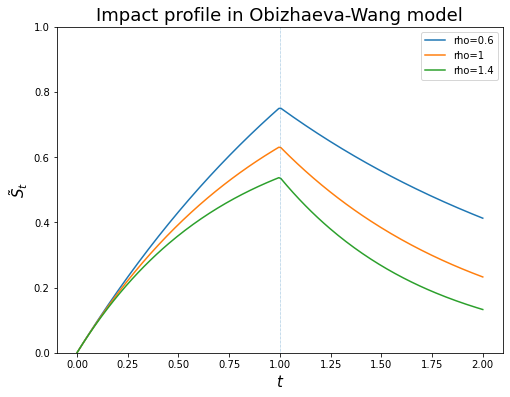

In [4]:
rhos = [0.6, 1, 1.4]
def twap_ow(t, rho):
    term1 = (1 - np.exp(-rho*t))*(t <= T) 
    term2 = (1 - np.exp(-rho*T))*np.exp(rho*(T-t))*(t > T) 
    return (term1 + term2)/rho

t = np.linspace(0, 2, 200)
plt.figure(figsize=(8, 6))
for rho in rhos:
    plt.plot(t, twap_ow(t, rho), label=f'rho={rho}')
plt.vlines(x=1, ymin=0, ymax=2, linewidth=0.5, ls='dotted')
plt.ylim([0, 1])
plt.xlabel(r'$t$', fontsize=15)
plt.ylabel(r'$\tilde S_t$', fontsize=15)
plt.title('Impact profile in Obizhaeva-Wang model', fontsize=18)
plt.legend();

## Optimal strategy in Obizhaeva-Wang

The Euler-Lagrange equation in this case reads:

$$
\eta \int_t^T\,v_s\,e^{-\rho\,(s-t)}\,ds + \eta \int_0^t\,v_s\,e^{-\rho\,(t-s)}\,ds  = \lambda.
$$

which may be rewritten as

$$\int_0^T\,v_s\,e^{-\rho\,|t-s|}\,ds = \frac\lambda\eta$$

which is a Fredholm integral equation of the first kind.

The solution is 

$$v_t = \frac\lambda\eta \,\left\{\delta(t)+\rho+\delta(T-t)\right\}$$

The Lagrange multiplier $\lambda$ is determined by

$$-X = x_T - x_0 = \int_0^T\, v_t \,dt = \frac\lambda\eta \, \left(2+\rho\,T\right)$$

Thus, $\frac\lambda\eta = -\frac X{2 + \rho T}$ and 

$$
v_t = -\frac X{2 + \rho T}\left\{\delta(t)+\rho+\delta(T-t)\right\}.
$$

The optimal strategy consists of block trades at $t=0$ and $t=T$ and continuous trading at
the constant rate $\rho$ between these two times.

#### Note
- The case $\rho = 0$ corresponds to the Almgren-Chriss model with only permanent impact. In this case, the strategy suggests a block trade of half of the total shares at the beginning and a block trade of the other in the end. In fact, in this case all strategies are optimal since the expected cost is a constant, independent of the strategies! 

## Obizhaeva-Wang as a control problem

We may recast the optimal execution problem in the Obizhaeva-Wang model as a control problem as follows. 

Let 

$$
Y_t = \eta \int_0^t e^{-\rho(t-s)} v_s ds.
$$

Thus, we can rewrite the dynamic for $S_t$ as  $S_t = s_0 + Y_t + \sigma_S Z_t$. It follows that the state equations are given by

\begin{eqnarray*}
&& dX_t = v_t dt, \quad X_0 = X \\
&& dY_t = \left\{\eta v_t - \rho Y_t \right\}dt, \quad Y_0 = 0 \\
\end{eqnarray*}

Objective functional (the expected cost)

\begin{eqnarray*}
&& \int_0^T y_t v_t dt.
\end{eqnarray*}

Notice that we end up with a deterministic control problem.

## Value function

As always, the value function $J$ is defined as

$$
J(t, x, y) = \min_v \int_t^T y_s v_s ds.
$$

## HJB equation

The value function will satisfy the following HJB equation.

\begin{eqnarray*}
&& J_t + \min_v\{yv + v J_x + (\eta v - \rho y)J_y \} \\
&=& J_t - \rho y J_y + \min_v\{(y + J_x + \eta J_y) v\} \\
&=& 0
\end{eqnarray*}

Turns out the control theory formulation of the optimal execution problem under Obizhaeva-Wang model is pretty tricky since 

$$
\min_v\{(y + J_x + \eta J_y) v\} = \left\{\begin{array}{ll}
- \infty & \mbox{if } y + J_x + \eta J_y \neq 0, \\
0 & \mbox{if } y + J_x + \eta J_y = 0.
\end{array}\right.
$$

Special treatment for this type of problems are required.

## Combining Almgren-Chriss and Obizhaeva-Wang: the ACOW model

We add up the Almgren-Chriss model and the Obizhaeva-Wang model as  

\begin{eqnarray*}
&& S_t = s_0 + \gamma (X_t - X_0) + Y_t + \sigma_S W_t, \\
&& \tS_t = S_t + \eta v_t,
\end{eqnarray*}

where

$$
Y_t = \int_0^t e^{-\rho(t - s)} \phi v_s ds + \sigma \int_0^t e^{-\rho(t-s)} dZ_s
$$

be the price impact (due to trading). Then $Y_t$ satisfies the ODE

$$
d Y_t = \{\phi v_t - \rho Y_t\}dt + \sigma dZ_t, \quad Y_0 = 0.
$$


- $S_t$: efficient/mid price
- $\tilde S_t$: traded price
- $Y_t$: (stochastic) impact to the efficient/mid price due to trading as in Obizhaeva-Wang
- $\phi v_t$: linear instantaneous impact
- $\eta v_t$: linear temporary impact
- $\gamma (X_t - X_0)$: linear permanent impact

#### Note
- Without the $Y$ term, the model reduces to Almgren-Chriss.
- If $\gamma = \eta = \sigma = 0$, the model reduces to Obizhaeva-Wang.
- The rationale is that Almgren-Chriss takes care of the permanent impact component whereas the trasient impact component for Obizhaeva-Wang.

## Impact profile under the model

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

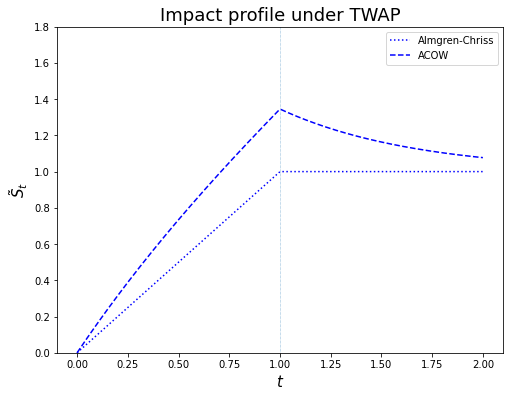

In [6]:
T = 1
twap_AC = lambda t: t/T*(t <= T) + T*(t > T)
rho = 1.5
m = 2/3
def twap_model(t):
    term1 = (1 - np.exp(-rho*t))*(t <= T) 
    term2 = (1 - np.exp(-rho*T))*np.exp(rho*(T-t))*(t > T) 
    invent = m*(term1 + term2)/rho
    return invent + twap_AC(t)

t = np.linspace(0, 2, 200)
plt.figure(figsize=(8, 6))
plt.plot(t, twap_AC(t), ls='dotted', color='blue', label='Almgren-Chriss')
plt.plot(t, twap_model(t), ls='dashed', color='blue', label='ACOW')
plt.vlines(x=1, ymin=0, ymax=2, linewidth=0.5, ls='dotted')
plt.ylim([0, 1.8])
plt.xlabel(r'$t$', fontsize=15)
plt.ylabel(r'$\tilde S_t$', fontsize=15)
plt.title('Impact profile under TWAP', fontsize=18)
plt.legend();

## Control problem

State equations
\begin{eqnarray*}
&& dX_t = v_t dt, \quad X_0 = X \\
&& dY_t = \left\{\phi v_t - \rho Y_t \right\}dt + \sigma dZ_t, \quad Y_0 = 0, \\
&& S_t = s_0 + \gamma (X_t - X_0) + Y_t + \sigma_S W_t \\
&& s_0 - \tS_t = -\gamma (X_t - X_0) - Y_t - \sigma_S W_t - \eta v_t
\end{eqnarray*}

Objective functional (the expected P&L, marked to the price $s_0$)

\begin{eqnarray*}
&& \Eof{X_T(S_T - s_0) + \int_0^T (s_0 - \tS_t) dX_t} \\
&=& \Eof{X_T \{\gamma (X_T - X_0) + Y_T + \sigma_S W_T\} - \int_0^T \left\{\gamma (X_t - X_0) + Y_t + \sigma_S W_t + \eta v_t \right\} dX_t}
\end{eqnarray*}

Note that, by applying integration by parts, we have

\begin{eqnarray*}
&& -\gamma \int_0^T (X_t - X_0) dX_t -\int_0^T (Y_t + \sigma_S W_t) dX_t - \eta \int_0^T v_t^2 dt \\
&=& -\frac\gamma2 (X_T - X_0)^2 - X_T (Y_T + \sigma_S W_T) + X_0 (Y_0 + \sigma_S W_0) + \int_0^T X_t dY_t + \sigma_S \int_0^T X_t dW_t - \eta \int_0^T v_t^2 dt \\
&=& -\frac\gamma2 (X_T - X_0)^2 -X_T (Y_T + \sigma_S W_T) + \int_0^T X_t \left\{\phi v_t - \rho Y_t \right\} dt + \sigma \int_0^T X_t dZ_t + \sigma_S \int_0^T X_t dW_t - \eta \int_0^T v_t^2 dt
\end{eqnarray*}

Thus,

\begin{eqnarray*}
&& \Eof{X_T \{\gamma (X_T - X_0) + Y_T + \sigma_S W_T)\} - \int_0^T \{\gamma (X_t - X_0) + Y_t + \sigma_S W_t + \eta v_t\} v_t dt} \\
&=& \Eof{ \frac\gamma2 (X_T^2 + X_0^2) + \int_0^T X_t \left\{\phi v_t - \rho Y_t \right\} - \eta v_t^2 dt}
\end{eqnarray*}

Penalize the final block trade by $-\beta X_T^2$. The objective functional reads 

\begin{eqnarray*}
&=& \frac\gamma2 X_0^2 + \Eof{\left(\frac\gamma2 - \beta\right) X_T^2 + \phi \int_0^T X_s dX_s - \int_0^T \left(\rho X_s Y_s + \eta v_s^2\right) ds} \\
&=& \frac{\gamma - \phi}2 X_0^2 + \Eof{\left(\frac{\gamma + \phi}2 -\beta\right) X_T^2 - \int_0^T \left(\rho X_s Y_s + \eta v_s^2\right) ds}.
\end{eqnarray*}

## Matrix notations

Rewrite the equation in matrix notations. 

\begin{eqnarray*}
&& \bX = \left[\begin{array}{c} x \\ y \end{array}\right], \\
&& \mbP = \left[\begin{array}{cc}
\frac{\gamma + \phi}2 - \beta & 0 \\
0 & 0 
\end{array}\right],
\qquad
\mbQ = \left[\begin{array}{cc}
0 & -\frac\rho2 \\
-\frac\rho2 & 0 
\end{array}\right],
\qquad
\mbS = \left[0 \quad 0\right],
\qquad
\mbR = -\eta, \\
&& \mbA = \left[\begin{array}{cc}
0 & 0 \\
0 & -\rho
\end{array}\right],
\qquad
\mbB = \left[\begin{array}{c}
1 \\
\phi
\end{array}\right],
\qquad 
\bSigma = \left[\begin{array}{c}
0 \\
\sigma
\end{array}\right].
\end{eqnarray*}

## LQ problem

We obtain the following LQ control problem

$$
\max_u \Eof{\bX_T' \mbP \bX_T + \int_0^T \left(\bX_t' \mbQ \bX_t + \bu_t' \mbR \bu_t \right) dt}, 
$$

with the controlled SDE given by 

$$
d\bX_t = (A \bX_t + \mbB v_t)dt + \bSigma dZ_t
$$

## Value function and HJB equation

Let $V$ be the value function

$$
V(t, \bx) = \max_{\bu} \Eof{\left. \bX_T' \mbP \bX_T + \int_t^T \left(\bX_s' \mbQ \bX_s + \bu_s' \mbR \bu_s \right) ds\right|\bX_t = \bx}.
$$

$V$ satisfies the following HJB equation

$$
V_t + \frac12\tr(\bSigma\bSigma'\nabla^2 V) + \max_{\bu}\left\{(\mbA \bx + \mbB \bu)' \nabla V + \bx'\mbQ\bx + \bu_t' \mbR \bu_t \right\} = 0 
$$

with terminal condition $V(T, \bx) = \bx'\mbP\bx$.

#### Note
- $\mbR = -\eta$ is negative definite since we have a maximization problem. 

## Optimal control 

$$
\bu = - \frac12 \mbR^{-1} \mbB'\nabla V.
$$

\begin{eqnarray*}
&& V_t + \frac12\tr(\bSigma\bSigma'\nabla^2 V) + \max_{\bu}\left\{(\mbA \bx + \mbB \bu)' \nabla V + \bx'\mbQ\bx + \bu'\mbR\bu \right\} \\
&=& V_t + \frac12\tr(\bSigma\bSigma'\nabla^2 V) + \bx'\mbA' \nabla V + \bx'\mbQ\bx - \frac14 \nabla V' \mbB \mbR^{-1} \mbB' \nabla V
\end{eqnarray*}

## Ansatz

Assume the ansatz for value function $V(t, \bx) = \bx' H_1 \bx + H_0$. 

The optimal (feedback) control $\bu^*$ becomes

$$
\bu^* = - \frac12 \mbR^{-1} \mbB'\nabla V = \frac1{\eta} \mbB' H_1 \bx
$$

## Matrix Riccati equation

Compare the coefficients and obtain the matrix Riccati equation

\begin{eqnarray*}
&& \dot H_1 - H_1\mbB\mbR^{-1}\mbB'H_1 + \mbA' H_1 + H_1 \mbA + \mbQ = 0 \\
&& \dot H_0 + \tr(\bSigma\bSigma'H_1) = 0
\end{eqnarray*}

with terminal condition $H_1(T) = \mbP$ and $H_0(T) = 0$.

\begin{eqnarray*}
&& \dot H_1 + \frac1\eta H_1\mbB\mbB'H_1 + \mbA' H_1 + H_1 \mbA + \mbQ = 0 \\
&& \dot H_0 + \tr(\bSigma\bSigma'H_1) = 0
\end{eqnarray*}


# Solution to the Riccati equation

The solution to the matrix Riccati equation for $H_1$ can be characterized by the solution to the following linear system of equations 

$$
H_1 = M N^{-1}, 
$$

where $M$, $N$ satisfy the linear ODEs

$$
\frac{d}{dt} \left[\begin{array}{c} M \\ N \end{array}\right] =
\left[\begin{array}{cc} -\mbA & -\mbQ \\ 
\frac1{\eta}\mbB \mbB' & \mbA
\end{array}\right] \,
\left[\begin{array}{c} M \\ N \end{array}\right]
$$

with terminal conditions $M_T = H_1(T) = \mbP$ and $N_T = I$.

The solution to the linear system can be written as 

$$
\left[\begin{array}{c} M \\ N\end{array}\right] =e^{-(T-t)\Psi} \,
\left[\begin{array}{c} \mbP \\ I \end{array}\right]
$$

where 

$$
\Psi = \left[\begin{array}{cc} -\mbA & -\mbQ \\ 
\frac1{\eta}\mbB \mbB' & \mbA
\end{array}\right] \,
\left[\begin{array}{c} M \\ N \end{array}\right]
$$

The expected trading trajectory $x_t = \Eof{X_t}$ under optimal control $\bu^*$ satisfies

\begin{eqnarray*}
&& \dot x_t = \frac1{\eta} \mbB' H_1 \bx, \\
&& \dot y_t = \frac\phi{\eta} \mbB' H_1 \bx - \rho y_t,
\end{eqnarray*}

where $y_t = \Eof{Y_t}$.

Note that we have 

$$
\phi \dot x_t - (\dot y_t + \rho y_t) = 0
$$

Thus, 

$$
e^{\rho t} y_t - y_0 = \phi (x_t - x_0) \quad \Longrightarrow \quad y_t = e^{-\rho t}y_0 + e^{-\rho t}\phi(x_t - x_0) = e^{-\rho t}\phi(x_t - x_0) 
$$

since $y_0 = 0$.

## Numerical examples

In [7]:
from scipy.linalg import expm
from scipy.integrate import odeint

In [8]:
# liquidation horizon
T = 1

# number of shares to liquidate
x0 = 20_000

# mean reverting rate rho
# rho in the exponential decay kernel
rho = 10 # 1e-3

# parameters for market impact from Almgren-Chriss
eta = 2.5*1e-6 # temporary impact coefficient
gamma = 2.5*1e-7 # permanent impact coefficient

# final block trade penalty
beta = 1000*eta #, 100*eta, 1000*eta, 10_000*eta

# coefficient for inventory cost
# coefficient for linear instantaneous impact function
phi = 50*eta # eta, 5*eta, 10*eta, 100*eta

print(f'(gamma + phi)/2 - beta is {(gamma+phi)/2 - beta}.')


(gamma + phi)/2 - beta is -0.0024373749999999994.


In [9]:
# matrices
A = np.array([0, 0, 0, -rho]).reshape(2, 2)
P = np.array([(gamma + phi)/2 - beta, 0, 0, 0]).reshape(2, 2)
Q = np.array([0, -rho/2, -rho/2, 0]).reshape(2, 2)
B = np.array([1, phi]).reshape(2, 1)

# Psi
Psi = np.array([[0, 0, 0, rho/2], [0, rho, rho/2, 0], [1/eta, phi/eta, 0, 0], 
                [phi/eta, phi**2/eta, 0, -rho]])

In [10]:
# solution H1
def H1(t):
    # Matrix [P I]'
    PI = np.concatenate([P.reshape(4), np.identity(2).reshape(4)]).reshape(4, 2)
    # exponential Psi times [P I]'
    ePsiPI = lambda t: expm(-(T-t)*Psi).dot(PI)    
    M, N = ePsiPI(t)[:2], ePsiPI(t)[2:]
    return M.dot(np.linalg.inv(N))

# first order criterion for v
def v_opt(bx, t):
    BtH = B.transpose().dot(H1(t))
    return BtH.dot(bx)/eta

# ODE for x and y
def f(bx, t):
    x = bx[0]
    y = bx[1]
    dx = v_opt(bx, t)
    dy = phi*v_opt(bx, t) - rho*y
    return np.array([dx, dy]).reshape(2)

# solve optimal x and y numerically
def solve_opt_xy(n_steps=500): 
    t = np.linspace(0, T, n_steps+1)
    bx0 = np.array([x0, 0])
    soln1 = odeint(f, bx0, t)
    x_opt = soln1[:, 0]
    y_opt = soln1[:, 1]
    return x_opt, y_opt

In [11]:
n_steps = 200
t = np.linspace(0, 1, n_steps+1)
x, y = solve_opt_xy(n_steps)

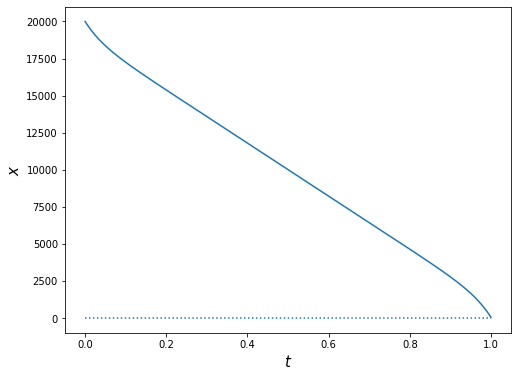

In [12]:
# plot optimal trajectory for x
plt.figure(figsize=(8, 6))
plt.plot(t, x)
plt.xlabel(r'$t$', fontsize=15)
plt.ylabel(r'$x$', fontsize=15)
plt.hlines(y=0, xmin=0, xmax=1, ls='dotted');

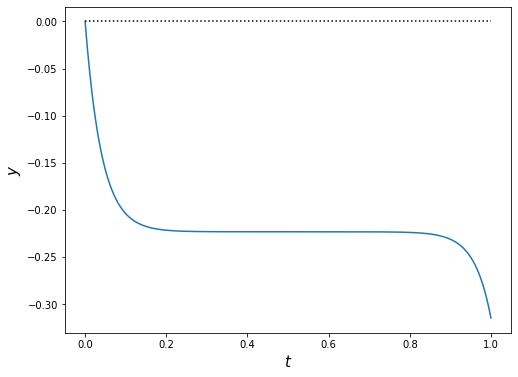

In [13]:
# plot trajectory for y under optimal policy
plt.figure(figsize=(8, 6))
plt.plot(t, y)
plt.xlabel(r'$t$', fontsize=15)
plt.ylabel(r'$y$', fontsize=15)
plt.hlines(y=0, xmin=0, xmax=1, ls='dotted', color='k');

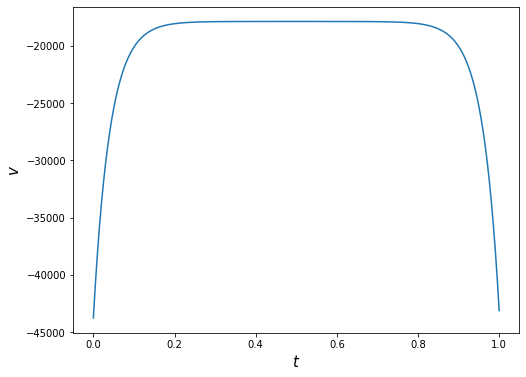

In [14]:
# the optimal trading rate v
v =np.array([])
for i in range(len(t)):
    BtH = B.transpose().dot(H1(t[i]))
    v = np.concatenate([v, BtH.dot([x[i], y[i]])/eta])

# plot optimal trajectory for v
plt.figure(figsize=(8, 6))
plt.plot(t, v)
plt.xlabel(r'$t$', fontsize=15)
plt.ylabel(r'$v$', fontsize=15);

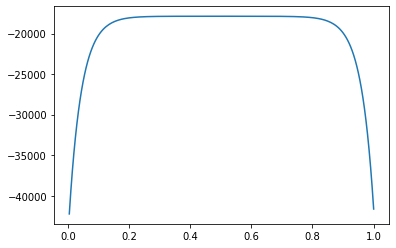

In [15]:
# in fact, v = dx/dt
plt.plot(t[1:], np.diff(x)/np.diff(t));

## Value distribution

Let's compare the performance of optimal trading strategy to TWAP and Almgren-Chriss in this setting.

## Create a `python` class for evaluating value function by simulation

In [16]:
import numpy as np
from scipy.stats import norm 
import seaborn as sns

class ValueDistribution:
    '''
    x0: number of shares to liquidate/acquire
    T: liquidation/acquistion horizon
    gamma: permanent impact coefficient
    eta: temporary impact coefficient
    rho: mean reverting rate
    beta: final block trade penalty
    phi: transient impact coefficient
    sigma: volatility of transient impact
    '''
    
    def __init__(self, params, strategy, n_steps=100):
        self.T = params['T']
        self.x0 = params['x0']
        self.eta = params['eta']
        self.gamma = params['gamma']
        self.beta = params['beta']
        self.phi = params['phi']
        self.rho = params['rho']
        self.sigma = params['sigma']
        self.n_steps = n_steps
        
        # strategy v as a function of x, y, t
        self.strategy = strategy
        
#        self.alpha = 2*self.eta/(2*self.beta - self.gamma)
        
    def simulate(self, n_sim=10_000):
        n_steps = self.n_steps
        v = self.strategy
        dt = self.T/self.n_steps
        gamma, phi, eta, beta, rho = self.gamma, self.phi, self.eta, self.beta, self.rho
        
        # initialize 
        y = np.zeros([n_sim, n_steps+1])
        x = np.ones([n_sim, n_steps+1])*self.x0
        V0 = np.zeros([n_sim, n_steps+1])

        for step in range(self.n_steps):
            dz = norm.rvs(size=n_sim)*np.sqrt(dt)
            dy = (phi*v(x[:,step], y[:,step], step*dt) - rho*y[:,step])*dt + sigma*dz
            dx = v(x[:,step], y[:,step], step*dt)*dt 
            dV0 = -(rho*x[:,step]*y[:,step] + eta*v(x[:,step], y[:,step], step*dt)**2)*dt
            x[:,step+1] = x[:,step] + dx
            y[:,step+1] = y[:,step] + dy
            V0[:,step+1] = V0[:,step] + dV0

        self.x, self.y, self.V0 = x, y, V0
        self.V = ((gamma + phi)/2 - beta)*x[:,-1]**2 + V0[:,-1]
        return self.V.mean()
    
    def V_hist(self, bins=50, kde=True, stat='density', element='step'):
        sns.histplot(self.V, bins=bins, kde=kde, stat=stat, element=element)
        plt.title('Histogram of V', fontsize=20);
        return None
    
    def __call__(self):
        pass        

### Policy 1: TWAP

In [17]:
# parameters
sigma = 0.1
params = {'T': T, 'x0': x0, 'eta': eta, 'gamma': gamma, 'rho': rho, 'beta': beta, 'phi': phi, 'sigma':sigma}

# A version of TWAP strategy
alpha = 2*eta/(2*beta - gamma)
v_twap = lambda x, y, t: -x/(T - t + alpha)

# instantiate the class and simulate
vd_twap = ValueDistribution(params=params, strategy=v_twap, n_steps=n_steps)
vd_twap.simulate()

19601.848785942813

### Sample path of running reward

4288


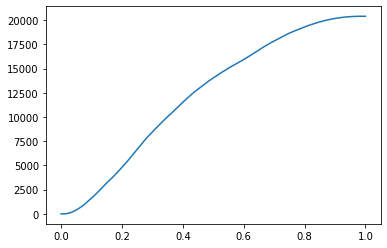

In [18]:
n_sim, n_steps = 10_000, 200
dt = T/n_steps
t = np.arange(0, T+dt, dt)
n_path = np.random.choice(n_sim)
plt.plot(t, vd_twap.V0[n_path,:]);
print(n_path)

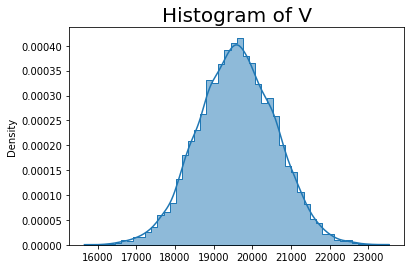

In [19]:
vd_twap.V_hist()

### Optimal policy

In [20]:
def v_opt(x, y, t):
    bx = np.column_stack([x, y])
    HB = H1(t).dot(B)
    return bx.dot(HB).flatten()/eta

In [21]:
vd_opt = ValueDistribution(params=params, strategy=v_opt, n_steps=n_steps)
vd_opt.simulate()

19747.787166332717

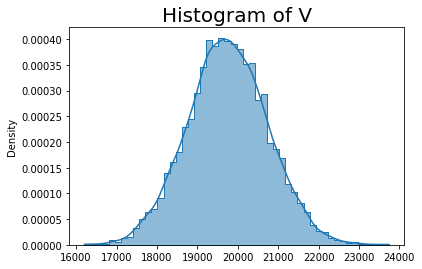

In [22]:
vd_opt.V_hist()

### Put together the histograms

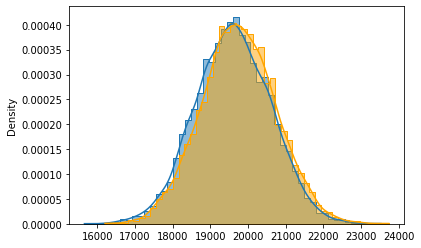

In [24]:
sns.histplot(vd_twap.V, bins=50, stat='density', element='step', kde=True);
sns.histplot(vd_opt.V, bins=50, stat='density', color='orange', element='step', kde=True);

### Sample path of liquidation

817

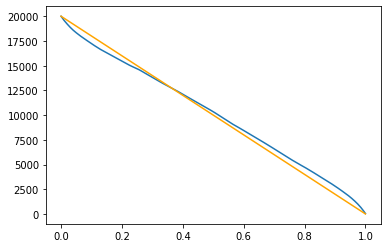

In [25]:
n_path = np.random.choice(n_sim)
plt.plot(t, vd_opt.x[n_path,:])
plt.plot(t, vd_twap.x[n_path,:], color='orange');
n_path

### Sample path of transient impact

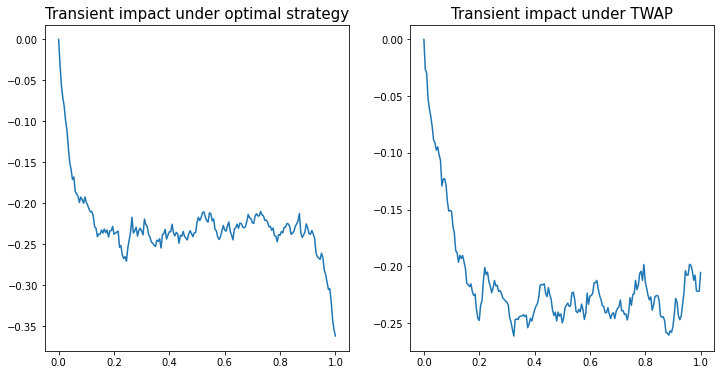

In [26]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(t, vd_opt.y[n_path,:])
plt.title('Transient impact under optimal strategy', fontsize=15)
plt.subplot(1, 2, 2)
plt.title('Transient impact under TWAP', fontsize=15)
plt.plot(t, vd_twap.y[n_path,:]);

## References
<br />

<div class="reflist" style="list-style-type: decimal;">

<ol>
  
  <li>Robert Almgren and Neil Chriss, Optimal execution of portfolio transactions, <i>Journal of Risk</i>, <b>3</b>, 5–40, (2001).
  </li>
   
  <li> Emanuel Bacry, Adrian Iuga, Matthieu Lasnier, and Charles-Albert Lehalle, Market impacts and the life cycle of investors orders, <i>Market Microstructure and Liquidity</i>, <b>1</b>(2), 1550009, (2015).
  </li>
  
  
  <li>Jim Gatheral, Lecture notes on market microstructure models, 
      <i>Baruch MFE course </i>.
  </li>
    
    
  <li> Anna Obizhaeva and Jiang Wang, Optimal trading strategy and
supply/demand dynamics, <i>Journal of Financial Markets</i>, <b>16</b>(1), 1–32, (2013).
  </li>
    
  <li> Elia Zarinelli, Michele Treccani, J. Doyne Farmer, and Fabrizio Lillo, Beyond the square root: Evidence for logarithmic dependence of market impact on size and participation rate, <i>Market Microstructure and Liquidity</i>, <b>1</b>(2), 1550004, (2015).
  </li>
  
</ol>